In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
inputs = keras.Input(shape=(28,28,))

In [5]:
inputs.shape

TensorShape([None, 28, 28])

In [6]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [7]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense (Dense)               (None, 28, 64)            1856      
                                                                 
 dense_1 (Dense)             (None, 28, 64)            4160      
                                                                 
 dense_2 (Dense)             (None, 28, 10)            650       
                                                                 
Total params: 6,666
Trainable params: 6,666
Non-trainable params: 0
_________________________________________________________________


In [10]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_4[0][0]']               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_5[0][0]']               
                                                                                         

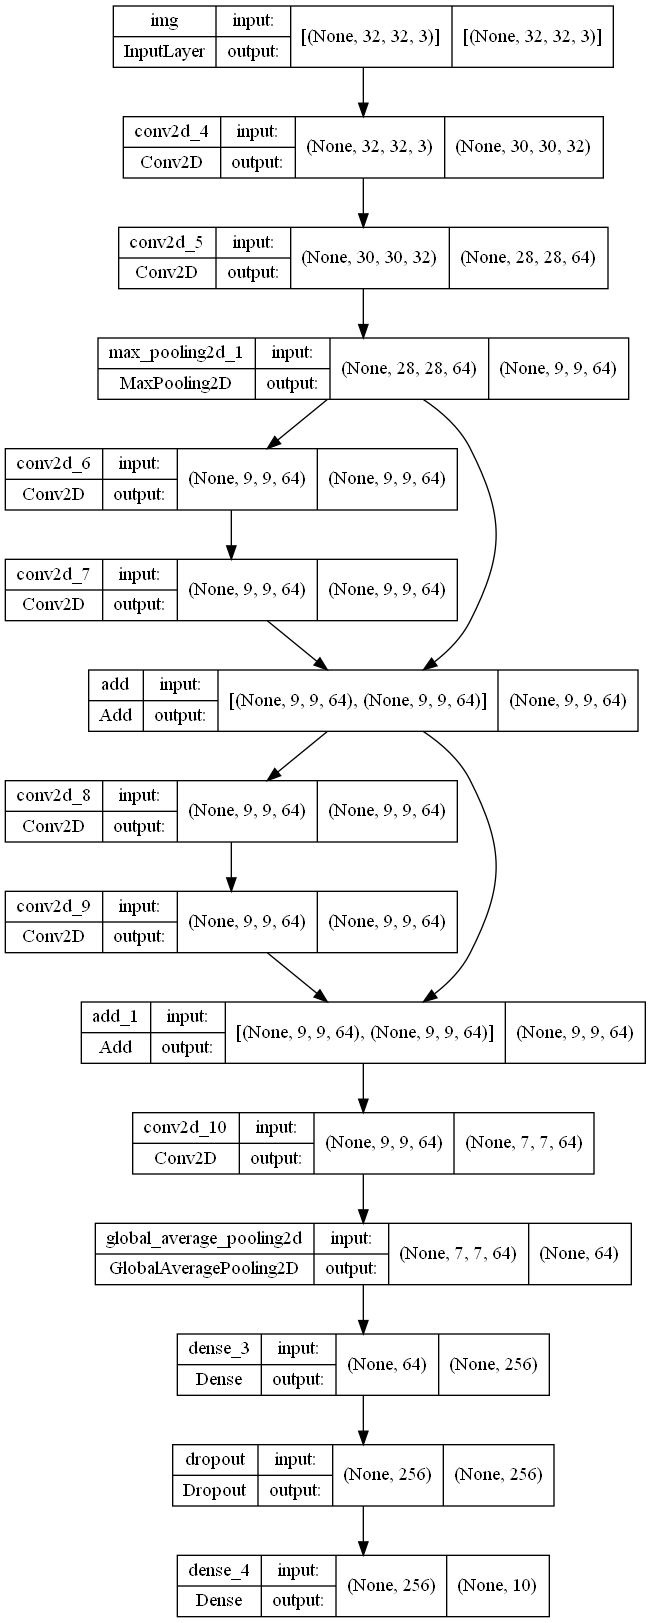

In [11]:
# ResNet Example
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [ ]:
class ResNet(tf.keras.Model):
    
    def __init__(self, num_classes=1000):
        super(ResNet, self).__init__()
        self.block_1 = ResNetBlock()
        self.block_2 = ResNetBlock()
        self.global_pool = layers.GlobalAveragePooling2D()
        self.classifier = Dense(num_classes)

    def call(self, inputs):
        x = self.block_1(inputs)
        x = self.block_2(x)
        x = self.global_pool(x)
        return self.classifier(x)


resnet = ResNet()
dataset = ...
resnet.fit(dataset, epochs=10)
resnet.save(filepath)